#### libraries to be imported first

In [117]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### read data to a dataset

In [118]:
#read csv
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [119]:
#shape of the dataset imported
train.shape

(1460, 81)

In [120]:
#go through the dataset, mean and everything listed below in the results
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [121]:
#columns name, .keys() can be used as well for this
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [122]:
#dropping duplicates if any?
train.drop_duplicates(keep='first') 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


##### looks like no duplicate record is there, thats awesome:)

In [123]:
#correlation matrix using corr() fuction; will have to look for any multicolinearity if any
corr = train.corr()
corr = corr.SalePrice.sort_values(ascending=False)
#filtering for "SalesPrice" columns by sorting it in descending order 
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

definatly there is correlations between few columns ....

#### Analysis of the data ; EDA; but first looking at the data, duplicates, missng values and all

For imputing we can impute using any method, like for numercial columns we can use mean,median kind of values to be imputed, so is used in the below approach.

Well as the data dictionary informs us regarding the categorical columns or features, that for some categories, the value  "NaN" actually means something. So looking at that , we are going to fill in a value like 'none' for instance so that we can keep that information with us and do not make any changes in the analysis by dropping them.

In [124]:
#look at the null values as shown
train_data_nulls = pd.isnull(train).sum()
train_data_nulls = train_data_nulls.to_frame("Traning_data")
train_data_nulls

,Traning_data
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [125]:
#as per the data dictionary we could find below mentioned features where the null means somehting
something_null_in_data = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [126]:
#as mentioned above we are imputing 'none', in place of NA in the dataset to make it more meaningful
for i in something_null_in_data:
    train[i].fillna("None", inplace=True)

##### now look at more imputing of data

In [127]:
#using the imputer from sklearn as below for helping out with this
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [128]:
#again checking the null values, as its important to find them out and make sure they are used properly, since they mean somehitng
train_null_data = pd.isnull(train).sum()
train_null_data = train_null_data.to_frame("TRaining_data")
train_null_data

,TRaining_data
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0


In [129]:
#checking if there are many values missibg let say > 200
train_null_data[train_null_data.sum(axis=1) > 200]  

,TRaining_data
LotFrontage,259


###### LotFrontage has too many Null values(i.e. > 200), may be better to just drop it as it is a numerical value feature, can't do much about it, hence dropping it

In [130]:
#dropped
train.drop("LotFrontage", axis=1, inplace=True)

In [131]:
#looking at the null values which are not that greater than 200, may be called as less number of nulls
train_not_many_nulls = train_null_data[(train_null_data.sum(axis=1) > 0) & (train_null_data.sum(axis=1) < 200)]
train_not_many_nulls

,TRaining_data
MasVnrType,8
MasVnrArea,8
Electrical,1
GarageYrBlt,81


In [132]:
#imputing them all..... to make sure they don't cause troubles while creating models
train.GarageYrBlt.fillna(train["GarageYrBlt"].median(), inplace=True)
train.MasVnrArea.fillna(train["MasVnrArea"].median(), inplace=True)
train.MasVnrType.fillna("None", inplace=True)
train.Electrical.fillna("None", inplace=True)


In [133]:
#handling fewer missing ones, first organising the features as per numeric and categorical manner
train_dtypes = train.dtypes 
train_numeric_features = train_dtypes[(train_dtypes != object) ]
train_categorical_feature = train_dtypes[train_dtypes == object] 


In [134]:
#Converting num_features to list and then traversing it to impute as shown.......
train_numeric_val = list(train_numeric_features.index)

train_filled_numercal_data = []
for i in train_numeric_val:
    if i in list(train_not_many_nulls.index):
        train_filled_numercal_data.append(i)
train_filled_numercal_data        

['MasVnrArea', 'GarageYrBlt']

In [135]:
for i in train_filled_numercal_data:
    train[i].fillna(train[i].median(), inplace=True)


#####  as we Imputed the numeric features doing the same with the Categorically one with the method mentioned earlier


In [136]:
categorical_value_train = list(train_categorical_feature.index)
train_filled_categorical_data = []

for x in categorical_value_train:
    if x in list(train_not_many_nulls.index):
        train_filled_categorical_data.append(x)
        
train_filled_categorical_data        

['MasVnrType', 'Electrical']

well this must be it, now we can finally proceed towards model building....

In [137]:
# recheking again to make sure.... before we go with actual.. 
train_null_data = pd.isnull(train).sum()
train_null_data = train_null_data.to_frame("Training_data")
train_null_data[train_null_data.sum(axis=1) > 0]

,Training_data


now we can see that its not having any null data....

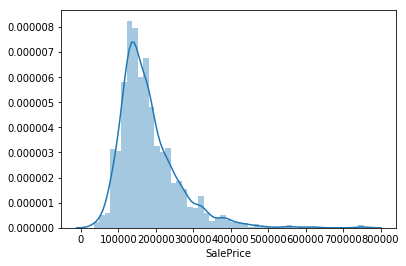

In [138]:
sns.distplot(train["SalePrice"]);

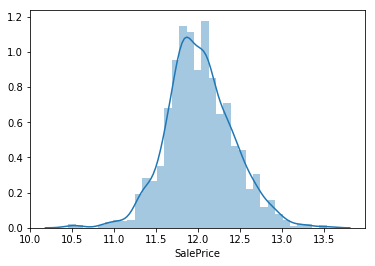

In [139]:
sns.distplot(np.log(train["SalePrice"]));

So looking at the graphs it seems tat we need to transform the prices that would make sure tha the model's performance is boosted. As its skewed, we are going to transform....

In [140]:
train["TransformedPrice"] = np.log(train["SalePrice"])

Categorical features awaits, we are goinging to look at them next...

In [141]:
#creating a list of them firts and look at them further
categorical_values_train = list(train_categorical_feature.index)
categorical_values_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [142]:
#changing categorical values to representative number
for x in categorical_values_train:
    train_feature_set = set(train[x])

    for y in train_feature_set:
        feature_list = list(train_feature_set)
        train.loc[train[x] == y, x] = feature_list.index(y)

In [143]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,4,8450,0,0,3,3,0,4,...,1,0,1,0,2,2008,4,3,208500,12.247694
1,2,20,4,9600,0,0,3,3,0,1,...,1,0,1,0,5,2007,4,3,181500,12.109011
2,3,60,4,11250,0,0,1,3,0,4,...,1,0,1,0,9,2008,4,3,223500,12.317167
3,4,70,4,9550,0,0,1,3,0,2,...,1,0,1,0,2,2006,4,4,140000,11.849398
4,5,60,4,14260,0,0,1,3,0,1,...,1,0,1,0,12,2008,4,3,250000,12.429216


now we are finally going to model buildng, here we go.....

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore", category=DeprecationWarning) 

##### working further on train and test sets further

In [145]:
X_t = train.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_t = train["TransformedPrice"].values

#### Split for train and test

In [146]:
from sklearn.model_selection import train_test_split #to create test data set
# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_t)

# split
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size = 0.3,random_state = 1)

#####  As learned in the program we need to have a Split into Validation set as well from train set...

for evaluating the model and to avoid the ovefitting phenomeon we are further going to split our training data into a small validation sets.

In [147]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=0) 

##### Now lets get ti  Linear Regression Model buildng

In [148]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

In [149]:
grid_linreg.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [150]:
str(grid_linreg.best_score_)

'0.5652797072042344'

In [151]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))

In [152]:
str(rmse_lin)

'6297943458.77174'

In [153]:
str(r2_lin)

'-3.2395143946382075e+20'

In [154]:
scores_lin = cross_val_score(linreg, X_train, y_train, cv=10, scoring="r2")
np.mean(scores_lin)

0.569004698298221

##### Let look at the Lasso Model(building and analysis)

In [155]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#number of alphas to tune....
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()
# cross validation
lasso_grid = GridSearchCV(estimator = lasso, param_grid = params,scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            
lasso_grid.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [156]:
lasso = lasso_grid.best_estimator_
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_valid)
r2_lasso = r2_score(y_valid, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_valid, lasso_pred))

In [157]:
str(r2_lasso)

'0.905881845435595'

In [158]:
str(rmse_lasso)

'0.10734838173004478'

In [159]:
scores_lasso = cross_val_score(lasso, X_train, y_train, cv=10, scoring="r2")

In [160]:
str(np.mean(scores_lasso))

'0.7779434380025031'

In [161]:
cv_results = pd.DataFrame(lasso_grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057413,0.052490,0.0008,0.001601,0.0001,{'alpha': 0.0001},-0.107934,-0.103958,-0.105378,-0.107514,...,-0.110360,0.008474,3,-0.087567,-0.094959,-0.095073,-0.083332,-0.088370,-0.089860,0.004545
1,0.022795,0.007096,0.0000,0.000000,0.001,{'alpha': 0.001},-0.106633,-0.098047,-0.102778,-0.109647,...,-0.102925,0.004726,2,-0.087036,-0.094707,-0.094555,-0.083211,-0.095508,-0.091003,0.004962
2,0.015629,0.009881,0.0000,0.000000,0.01,{'alpha': 0.01},-0.109103,-0.093497,-0.099224,-0.111974,...,-0.101858,0.007372,1,-0.090317,-0.099540,-0.099581,-0.087679,-0.099268,-0.095277,0.005195
3,0.056251,0.007643,0.0000,0.000000,0.05,{'alpha': 0.05},-0.125834,-0.103233,-0.116360,-0.124057,...,-0.114978,0.009293,4,-0.104646,-0.112868,-0.114528,-0.101940,-0.114820,-0.109761,0.005391
4,0.054555,0.015359,0.0008,0.001601,0.1,{'alpha': 0.1},-0.132802,-0.113365,-0.125651,-0.128943,...,-0.122735,0.008161,5,-0.112790,-0.122127,-0.121761,-0.108380,-0.123466,-0.117705,0.006005


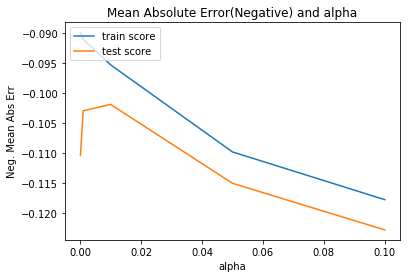

In [162]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Neg. Mean Abs Err')

plt.title("Mean Absolute Error(Negative) and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [163]:
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-3.46503068e-04,  1.35130943e-02,  2.36961605e-06, -0.00000000e+00,
        0.00000000e+00, -1.13039264e-02,  1.83587264e-02,  0.00000000e+00,
        4.90844763e-04, -3.78587368e-02, -1.52761645e-03,  1.09008915e-02,
       -9.85766920e-03,  7.03992771e-03, -1.53132224e-03,  7.16624889e-02,
        3.87240543e-02,  2.16035649e-03,  9.12839012e-04,  9.20782594e-03,
       -1.14651477e-02,  5.91285886e-03, -3.89397424e-03, -4.64029628e-03,
        6.56079717e-06,  3.89244127e-02, -3.18623749e-02,  6.04239266e-03,
        9.39787083e-03, -8.81396350e-03,  1.24794920e-02, -7.80481862e-03,
       -9.52728980e-06,  1.57492269e-02,  1.21501870e-04, -1.55135582e-05,
       -1.12978494e-05,  1.14310776e-02,  8.00295623e-03,  1.30071610e-02,
       -5.67863239e-03,  1.80154381e-04,  1.27621006e-04,  2.78567889e-04,
        1.35537043e-05,  4.42703932e-02,  8.55555208e-03,  3.18180940e-02,
        0.00000000e+00,  1.81182911e-02, -6.65684805e-03,  9.90529827e-03,
        1.21587344e-02,  

In [164]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 21.584),
 ('Id', -0.0),
 ('MSSubClass', 0.014),
 ('MSZoning', 0.0),
 ('LotArea', -0.0),
 ('Street', 0.0),
 ('Alley', -0.011),
 ('LotShape', 0.018),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LotConfig', -0.038),
 ('LandSlope', -0.002),
 ('Neighborhood', 0.011),
 ('Condition1', -0.01),
 ('Condition2', 0.007),
 ('BldgType', -0.002),
 ('HouseStyle', 0.072),
 ('OverallQual', 0.039),
 ('OverallCond', 0.002),
 ('YearBuilt', 0.001),
 ('YearRemodAdd', 0.009),
 ('RoofStyle', -0.011),
 ('RoofMatl', 0.006),
 ('Exterior1st', -0.004),
 ('Exterior2nd', -0.005),
 ('MasVnrType', 0.0),
 ('MasVnrArea', 0.039),
 ('ExterQual', -0.032),
 ('ExterCond', 0.006),
 ('Foundation', 0.009),
 ('BsmtQual', -0.009),
 ('BsmtCond', 0.012),
 ('BsmtExposure', -0.008),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.016),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.011),
 ('Heating', 0.008),
 ('HeatingQC', 0.013),
 ('CentralAir', -0.006),
 ('Electrical', 0.0),
 ('1s

HouseStyle,OverallQual,MasVnrArea,GrLivArea,Functional -- here are few features that can be selected 

##### looking at the Ridge Model

In [179]:
# alfas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}
ridge = Ridge()
# cross validation .....
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
grid_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
grid_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [166]:
str(grid_ridge.best_estimator_)

"Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,\n   normalize=False, random_state=None, solver='auto', tol=0.001)"

In [167]:
str(grid_ridge.best_score_)

'-0.10300394712879543'

In [168]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))

In [169]:
str(r2_ridge)

'0.8953987443018311'

In [170]:
str(rmse_ridge)

'0.11316894033580593'

In [171]:
scores_ridge = cross_val_score(ridge, X_train, y_train, cv=10, scoring="r2")

In [172]:
#cross validatiopn score
np.mean(scores_ridge)

0.8064089064232492

In [173]:
print("Sorted by R Squared:")
model_perfor.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,Best Score,R Squared,RMSE
2,Lasso,-0.101858,0.905,0.107348
1,Ridge,-0.103004,0.895,0.113168
0,Linear Regression,0.565280,-3.23,62979434


In [175]:
cv_results = pd.DataFrame(grid_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016001,0.011593,0.002400,0.001960,0.001,{'alpha': 0.001},-0.100718,-0.102553,-0.107868,-0.099500,...,-0.109545,0.014084,5,-0.094988,-0.083399,-0.087724,-0.095867,-0.087494,-0.089894,0.004781
1,0.011198,0.005877,0.002400,0.001960,0.01,{'alpha': 0.01},-0.100717,-0.102553,-0.107861,-0.099508,...,-0.108790,0.012606,4,-0.094988,-0.083404,-0.087726,-0.095868,-0.088033,-0.090004,0.004730
2,0.013605,0.009664,0.002397,0.001957,1,{'alpha': 1.0},-0.100586,-0.102467,-0.107504,-0.099863,...,-0.104510,0.004654,3,-0.095028,-0.083616,-0.087752,-0.095852,-0.093934,-0.091236,0.004758
3,0.008000,0.002529,0.003200,0.001600,5,{'alpha': 5.0},-0.099945,-0.101756,-0.106902,-0.099419,...,-0.103706,0.004310,2,-0.094882,-0.083540,-0.087446,-0.095625,-0.094108,-0.091120,0.004782
4,0.007201,0.002992,0.004001,0.002529,10,{'alpha': 10.0},-0.099240,-0.101072,-0.106411,-0.098564,...,-0.103004,0.004348,1,-0.094715,-0.083386,-0.087151,-0.095363,-0.093908,-0.090905,0.004776


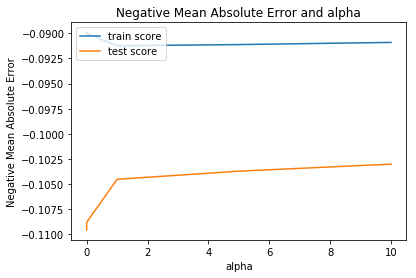

In [176]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Abs Error')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [181]:
#made choice from above
alpha =10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.26526224e-04,  1.55193880e-02,  2.42790198e-06,  1.89726167e-04,
        5.61909373e-03, -1.20379507e-02,  2.12114517e-02,  0.00000000e+00,
        1.31274309e-03, -4.70975490e-02, -1.51282100e-03,  1.19104385e-02,
       -2.17604393e-02,  1.18691153e-02, -4.23848116e-03,  6.91593830e-02,
        3.79984468e-02,  1.95297879e-03,  8.51051145e-04,  1.09634722e-02,
       -1.48378621e-02,  6.40432787e-03, -4.30488054e-03, -7.52440849e-03,
        1.24004514e-05,  4.30385797e-02, -3.49306919e-02,  7.21612263e-03,
        1.02995531e-02, -1.11836466e-02,  1.27236723e-02, -8.48156509e-03,
       -4.08695776e-05,  1.43580638e-02,  9.18349103e-05, -3.99442167e-05,
        1.10211204e-05,  1.52691940e-02,  9.01017895e-03,  2.91335969e-02,
       -1.24622673e-02,  4.13529468e-05, -1.94176209e-05,  1.26471260e-04,
        1.48406583e-04,  5.05964581e-02,  2.50259529e-02,  4.11464534e-02,
        6.59173721e-03,  1.99322668e-02, -3.14909317e-02,  1.19432963e-02,
        1.37982370e-02,  

In [178]:
# R model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 22.681),
 ('Id', -0.0),
 ('MSSubClass', 0.016),
 ('MSZoning', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.006),
 ('Alley', -0.012),
 ('LotShape', 0.021),
 ('LandContour', 0.0),
 ('Utilities', 0.001),
 ('LotConfig', -0.047),
 ('LandSlope', -0.002),
 ('Neighborhood', 0.012),
 ('Condition1', -0.022),
 ('Condition2', 0.012),
 ('BldgType', -0.004),
 ('HouseStyle', 0.069),
 ('OverallQual', 0.038),
 ('OverallCond', 0.002),
 ('YearBuilt', 0.001),
 ('YearRemodAdd', 0.011),
 ('RoofStyle', -0.015),
 ('RoofMatl', 0.006),
 ('Exterior1st', -0.004),
 ('Exterior2nd', -0.008),
 ('MasVnrType', 0.0),
 ('MasVnrArea', 0.043),
 ('ExterQual', -0.035),
 ('ExterCond', 0.007),
 ('Foundation', 0.01),
 ('BsmtQual', -0.011),
 ('BsmtCond', 0.013),
 ('BsmtExposure', -0.008),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.014),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.015),
 ('Heating', 0.009),
 ('HeatingQC', 0.029),
 ('CentralAir', -0.012),
 ('Electrical', 0.0),
 ('

looking at the variables above we can choose the right ones, and the create a linear model to see the progress